Import Setup: Pandas, SQL, Matplotlib

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

As a Data Analyst, I want to use MySQL Connector to establish a connection to my remote data source


In [198]:
my_sales_df = connection.connect(host= "devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database= "salesdb", user= "root", password= "D3v$tudent", use_pure= True)

 As a Data Analyst, I want to query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable


In [199]:
joined_query = "SELECT * FROM sales LEFT JOIN cities USING (City_ID)"

joined_df = pd.read_sql(joined_query, my_sales_df)
joined_df.head()

C:\Users\bcabb\AppData\Local\Temp\ipykernel_6668\3863045682.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_df = pd.read_sql(joined_query, my_sales_df)


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


As a Data Analyst, I want to perform the necessary data cleaning and wrangling steps for my DataFrame.  This will include:

-Exploring the information of the joined DataFrame

-Checking for and removing null values, if necessary

-Checking for and removing duplicate rows, if necessary

-Converting any necessary columns to Pandas DateTime format


In [200]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City_ID        1000 non-null   int64  
 1   Invoice_ID     1000 non-null   object 
 2   Customer_Type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product_Line   1000 non-null   object 
 5   Unit_Price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Sales_Tax      0 non-null      object 
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  COGS           1000 non-null   float64
 13  Gross_Income   1000 non-null   float64
 14  Rating         1000 non-null   float64
 15  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 125.1+ KB


In [201]:
joined_df.dropna()


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City


In [202]:
joined_df.duplicated().sort_values()


0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

In [203]:
joined_df["Date"] = pd.to_datetime(joined_df["Date"])

joined_df["Time"] = pd.to_datetime(joined_df["Time"])

joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   City_ID        1000 non-null   int64         
 1   Invoice_ID     1000 non-null   object        
 2   Customer_Type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product_Line   1000 non-null   object        
 5   Unit_Price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Sales_Tax      0 non-null      object        
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   datetime64[ns]
 11  Payment        1000 non-null   object        
 12  COGS           1000 non-null   float64       
 13  Gross_Income   1000 non-null   float64       
 14  Rating         1000 non-null   float64       
 15  City           1000 no

As a Data Analyst, I want to explore my DataFrame to examine the spread of values across categories.  I will utilize this exploration to answer the following questions:

How many sales were made for members vs. normal customers?

How many sales were made at each store location?

How many sales were made for each product line?

What is the overall average rating, based on all sales records?


From this data I am seeing that that 501 sales were made by Members.

From the listed data it is concluded that "Normal" purchases account for 499 sales.

In [207]:
customer_freq = joined_df["Customer_Type"].value_counts()
print(customer_freq)

Member    501
Normal    499
Name: Customer_Type, dtype: int64


According to the data, sales per members vs non members were fairly even. I think if there are any added benefits to being a member, focusing on converting the non members since they are purchasing at a very similar rate.

In [210]:
store_count = joined_df["City"].value_counts()
print(store_count)

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64


All cities are doing relatively well and are close in sale with Seattle outselling by a slim margine.

In [216]:
product_count= joined_df["Product_Line"].value_counts()
print(product_count)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_Line, dtype: int64


In [217]:
#avg_rating = "SELECT avg(Rating) From salesdb.sales;"

#avg_rating_df = pd.read_sql(avg_rating, my_sales_df);
avg_rating_df = joined_df['Rating'].mean()

avg_rating_df

6.9727

The average rating for the entire data set is a rating of 6.9727.

As a Data Analyst, I want to create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:

A chart title

X-axis labels, if applicable

Y-axis labels, if applicable


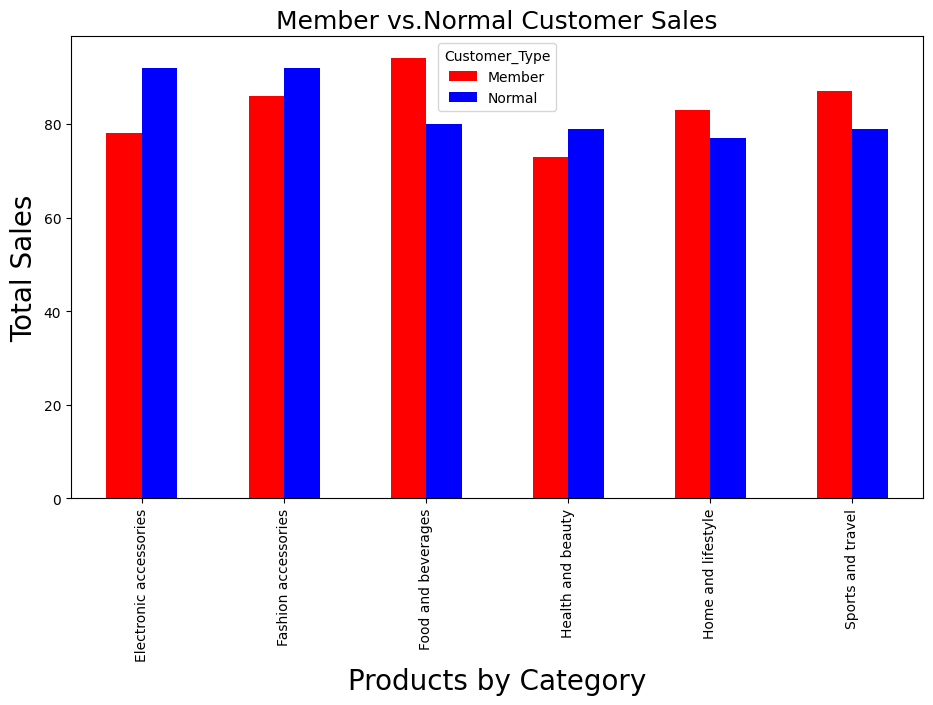

In [218]:
joined_df.groupby(["Product_Line", "Customer_Type"]).size().unstack().plot(kind="bar", color=["red", "blue"], figsize=(11,6))
plt.title("Member vs.Normal Customer Sales", fontsize=(18))
plt.xlabel("Products by Category", fontsize=20)
plt.ylabel("Total Sales", fontsize=20);

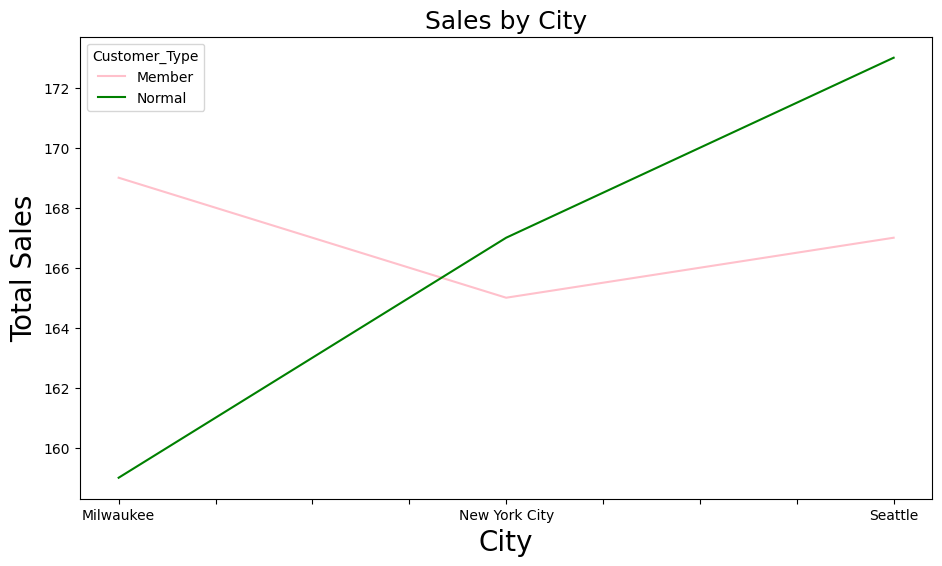

In [219]:
joined_df.groupby(["City", "Customer_Type"]).size().unstack().plot(kind="line", color=["pink", "green"], figsize=(11,6))
plt.title("Sales by City", fontsize=(18))
plt.xlabel("City", fontsize=20)
plt.ylabel("Total Sales", fontsize=20);

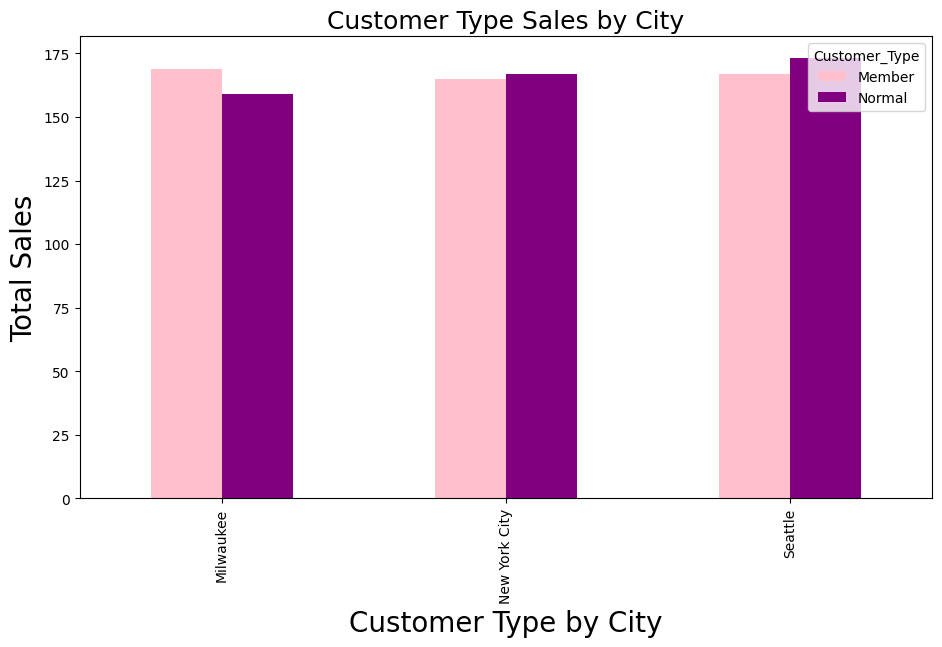

In [220]:
joined_df.groupby(["City", "Customer_Type"]).size().unstack().plot(kind="bar", color=["pink", "purple"], figsize=(11,6))
plt.title("Customer Type Sales by City", fontsize=(18))
plt.xlabel("Customer Type by City", fontsize=20)
plt.ylabel("Total Sales", fontsize=20);

As a Data Analyst, I want to describe numeric trends in my DataFrame, using the appropriate Pandas function

In [221]:
joined_df.describe()

,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,1.988000,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,0.817633,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,1.000000,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,1.000000,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,2.000000,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,3.000000,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,3.000000,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


As a Data Analyst, I want to explore the correlation between columns of my data set, using the appropriate Pandas function

In [222]:
joined_df.corr()

C:\Users\bcabb\AppData\Local\Temp\ipykernel_6668\828153247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joined_df.corr()


,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
City_ID,1.000000,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238
Unit_Price,0.028202,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.015964,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,0.010238,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


As a Data Analyst, I want to note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  I will ensure my plot includes the following:

*A chart title

*An X-axis label

*A Y-axis label


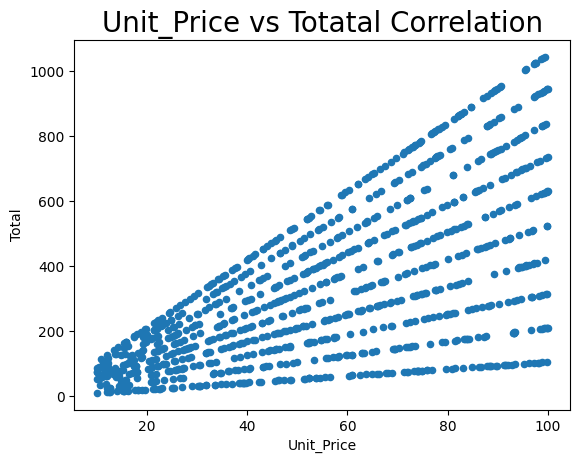

In [236]:
joined_df.plot.scatter( x= "Unit_Price", y= "Total")
plt.title("Unit_Price vs Totatal Correlation", fontsize= (20));

As a Data Analyst, I want to reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable


In [225]:
reshaped_x = joined_df[["Unit_Price"]]
reshaped_y = joined_df["Total"]

As a Data Analyst, I want to create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.


In [226]:
linear_r = LinearRegression()

linear_r.fit(reshaped_x, reshaped_y)

y_predict = linear_r.predict(reshaped_x)

As a Data Analyst, I want to create a visualization of my predictive model, and ensure I include the following stylizations:

A chart title

X-axis label

Y-axis label

A different color line for my predictive model


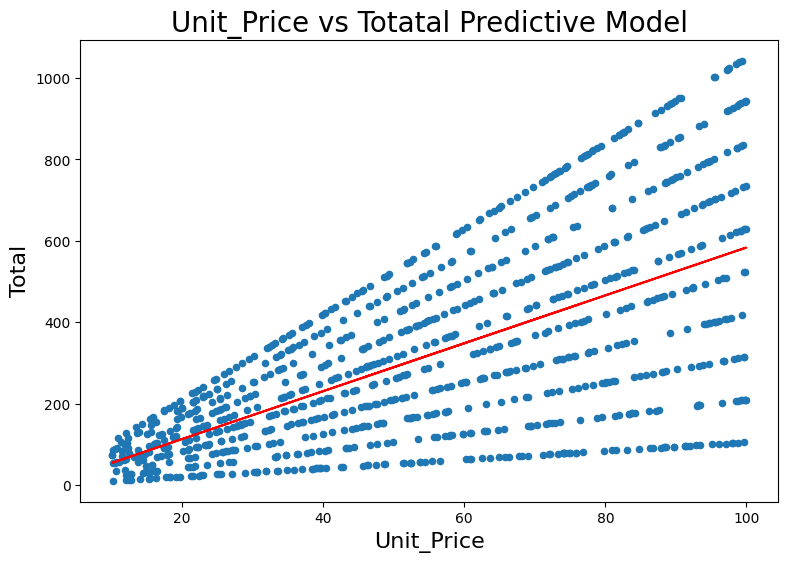

In [239]:
joined_df.plot.scatter(x= "Unit_Price", y= "Total", figsize= (9,6))


plt.title("Unit_Price vs Totatal Predictive Model", fontsize= (20))

plt.xlabel("Unit_Price", fontsize= 16)
plt.ylabel("Total", fontsize=16)
plt.plot(reshaped_x, y_predict, color= "red");

 As a Data Analyst, I want to present my findings as a Level I-style video recording (informal) that is no more than 5-8 minutes and covers the following:
The completed results of your Jupyter notebook
Key visualizations generated based off of evaluation questions
Any other cleaned/wrangled supporting data 
Communicate any insights you’ve gathered by working with the data
Make sure to address a specific individual in your video as if you were responding to a request for analysis (you can pick a fictional person or choose an instructor!)
